In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
astrosReg17 = pd.read_csv("../astrosReg17.csv")
astrosReg16 = pd.read_csv("../astros2016.csv")
astrosPost17 = pd.read_csv("../astrosPost17.csv")

soxReg17 = pd.read_csv("../sox18Reg.csv")
soxReg16 = pd.read_csv("../sox17.csv")
soxPost17 = pd.read_csv("../sox18Post.csv")

pitches2 = pd.read_csv("../pitches.csv")

In [16]:
atbats = pd.read_csv("../atbats.csv")
games = pd.read_csv("../games.csv")

In [23]:
pitches3 = pd.read_csv("../pitches.csv")

In [11]:
#Home is 2nd row, away is 3rd row
astrosReg17.head()

0    1581
1     754
2     827
3     472
Name: H, dtype: int64

In [32]:
#Runs created = obp * TB
astrosReg17['RunsCreated'] = astrosReg17['OBP'] + (astrosReg17['H'] - astrosReg17['2B'] - astrosReg17['3B'] - astrosReg17['HR']) + (2 * astrosReg17['2B']) + (3 * astrosReg17['3B']) + (4 * astrosReg17['HR']) 
#Iso power = SLG - AVG
astrosReg17['IsoPower'] = astrosReg17['SLG'] - astrosReg17['AVG']

#Runs created = obp * TB
astrosReg16['RunsCreated'] = astrosReg16['OBP'] + (astrosReg16['H'] - astrosReg16['2B'] - astrosReg16['3B'] - astrosReg16['HR']) + (2 * astrosReg16['2B']) + (3 * astrosReg16['3B']) + (4 * astrosReg16['HR']) 
#Iso power = SLG - AVG
astrosReg16['IsoPower'] = astrosReg16['SLG'] - astrosReg16['AVG']

astrosPost17['RunsCreated'] = 9*(astrosPost17['OBP'] + (astrosPost17['H'] - astrosPost17['2B'] - astrosPost17['3B'] - astrosPost17['HR']) + (2 * astrosPost17['2B']) + (3 * astrosPost17['3B']) + (4 * astrosPost17['HR'])) 
#Iso power = SLG - AVG
astrosPost17['IsoPower'] = astrosPost17['SLG'] - astrosPost17['AVG']

In [33]:
#Runs created = obp * TB
soxReg17['RunsCreated'] = soxReg17['OBP'] + (soxReg17['H'] - soxReg17['2B'] - soxReg17['3B'] - soxReg17['HR']) + (2 * soxReg17['2B']) + (3 * soxReg17['3B']) + (4 * soxReg17['HR']) 
#Iso power = SLG - AVG
soxReg17['IsoPower'] = soxReg17['SLG'] - soxReg17['AVG']

#Runs created = obp * TB
soxReg16['RunsCreated'] = soxReg16['OBP'] + (soxReg16['H'] - soxReg16['2B'] - soxReg16['3B'] - soxReg16['HR']) + (2 * soxReg16['2B']) + (3 * soxReg16['3B']) + (4 * soxReg16['HR']) 
#Iso power = SLG - AVG
soxReg16['IsoPower'] = soxReg16['SLG'] - soxReg16['AVG']

soxPost17['RunsCreated'] = 9*(soxPost17['OBP'] + (soxPost17['H'] - soxPost17['2B'] - soxPost17['3B'] - soxPost17['HR']) + (2 * soxPost17['2B']) + (3 * soxPost17['3B']) + (4 * soxPost17['HR'])) 
#Iso power = SLG - AVG
soxPost17['IsoPower'] = soxPost17['SLG'] - soxPost17['AVG']

In [19]:
astrosReg17

,GP,W,L,AB,R,H,2B,3B,HR,RBI,AVG,OBP,SLG,OPS,RunsCreated,IsoPower
0,162,101,61,5611,896,1581,346,20,238,854,0.282,0.346,0.478,0.823,2681.346,0.196
1,81,48,33,2701,395,754,165,6,115,382,0.279,0.340,0.472,0.812,1276.340,0.193
2,81,53,28,2910,501,827,181,14,123,472,0.284,0.351,0.483,0.834,1405.351,0.199
3,49,33,16,1690,299,472,97,8,78,283,0.279,0.353,0.485,0.837,819.353,0.206


In [36]:
astrosReg16

,GP,W,L,AB,R,H,2B,3B,HR,RBI,AVG,OBP,SLG,OPS,RunsCreated,IsoPower
0,162,84,78,5545,724,1367,291,29,198,689,0.247,0.319,0.417,0.735,2310.319,0.170
1,81,43,38,2722,334,648,135,15,98,320,0.238,0.311,0.407,0.717,1107.311,0.169
2,81,41,40,2823,390,719,156,14,100,369,0.255,0.326,0.426,0.752,1203.326,0.171


,GP,W,L,AB,R,H,2B,3B,HR,RBI,AVG,OBP,SLG,OPS,RunsCreated,IsoPower
0,18,11,7,605,78,145,33,1,27,73,0.240,0.314,0.431,0.745,261.314,0.191
1,9,8,1,297,51,81,19,0,18,49,0.273,0.343,0.519,0.862,154.343,0.246
2,9,3,6,308,27,64,14,1,9,24,0.208,0.284,0.347,0.632,107.284,0.139


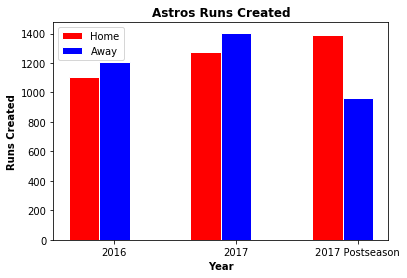

In [36]:
barWidth = 0.25

bars1 = [astrosReg16.loc[1, 'RunsCreated'], astrosReg17.loc[1, 'RunsCreated'], astrosPost17.loc[1, 'RunsCreated']]
bars2 = [astrosReg16.loc[2, 'RunsCreated'], astrosReg17.loc[2, 'RunsCreated'], astrosPost17.loc[2, 'RunsCreated']]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

 
# Make the plot
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='Home')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='Away')
 
# Add xticks on the middle of the group bars
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Runs Created', fontweight='bold')
plt.title('Astros Runs Created', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['2016', '2017', '2017 Postseason'])
 
# Create legend & Show graphic
plt.legend()
plt.savefig("astrosRunCreated.png")
plt.show()


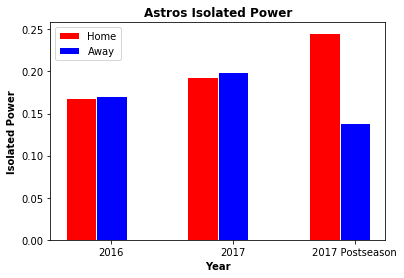

In [37]:
barWidth = 0.25

bars1 = [astrosReg16.loc[1, 'IsoPower'], astrosReg17.loc[1, 'IsoPower'], astrosPost17.loc[1, 'IsoPower']]
bars2 = [astrosReg16.loc[2, 'IsoPower'], astrosReg17.loc[2, 'IsoPower'], astrosPost17.loc[2, 'IsoPower']]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

 
# Make the plot
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='Home')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='Away')
 
# Add xticks on the middle of the group bars
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Isolated Power', fontweight='bold')
plt.title('Astros Isolated Power', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['2016', '2017', '2017 Postseason'])
 
# Create legend & Show graphic
plt.legend()
plt.savefig("astrosIso.png")
plt.show()

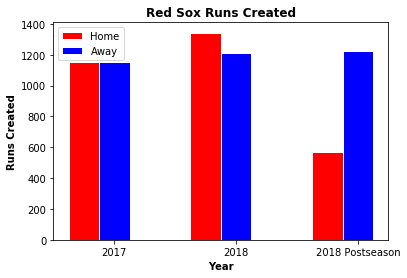

In [38]:
barWidth = 0.25

bars1 = [soxReg16.loc[1, 'RunsCreated'], soxReg17.loc[1, 'RunsCreated'], soxPost17.loc[1, 'RunsCreated']]
bars2 = [soxReg16.loc[2, 'RunsCreated'], soxReg17.loc[2, 'RunsCreated'], soxPost17.loc[2, 'RunsCreated']]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

 
# Make the plot
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='Home')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='Away')
 
# Add xticks on the middle of the group bars
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Runs Created', fontweight='bold')
plt.title('Red Sox Runs Created', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['2017', '2018', '2018 Postseason'])
 
# Create legend & Show graphic
plt.legend()
plt.savefig("soxRunCreated.png")
plt.show()


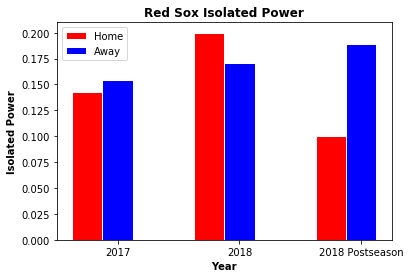

In [39]:
barWidth = 0.25

bars1 = [soxReg16.loc[1, 'IsoPower'], soxReg17.loc[1, 'IsoPower'], soxPost17.loc[1, 'IsoPower']]
bars2 = [soxReg16.loc[2, 'IsoPower'], soxReg17.loc[2, 'IsoPower'], soxPost17.loc[2, 'IsoPower']]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

 
# Make the plot
plt.bar(r1, bars1, color='red', width=barWidth, edgecolor='white', label='Home')
plt.bar(r2, bars2, color='blue', width=barWidth, edgecolor='white', label='Away')
 
# Add xticks on the middle of the group bars
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Isolated Power', fontweight='bold')
plt.title('Red Sox Isolated Power', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['2017', '2018', '2018 Postseason'])
 
# Create legend & Show graphic
plt.legend()
plt.savefig("soxIso.png")
plt.show()

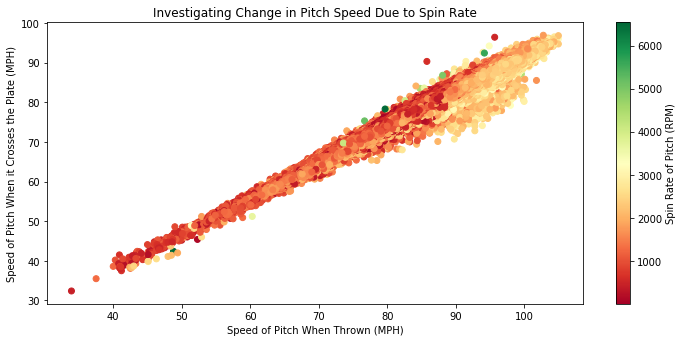

In [29]:
#speed of pitch and spin rate?

0.19300000000000006

In [5]:
high_effect = 'X'
medhigh_effect = 'D'
med_effect = 'H'
lowmed_effect = 'B'
low_effect = '*B'

bad_effect1 = 'F'
bad_effect2 = 'C'
bad_effect3 = 'W'
bad_effect4 = 'D'
bad_effect5 = 'S'

In [6]:
pitches2['Effectiveness'] = 0

In [7]:
pitches2.loc[pitches2['code'] == high_effect,'Effectiveness'] = 5
pitches2.loc[pitches2['code'] == medhigh_effect,'Effectiveness'] = 4
pitches2.loc[pitches2['code'] == med_effect,'Effectiveness'] = 3
pitches2.loc[pitches2['code'] == lowmed_effect,'Effectiveness'] = 2
pitches2.loc[pitches2['code'] == low_effect,'Effectiveness'] = 1
pitches2.loc[pitches2['code'] == bad_effect1,'Effectiveness'] = -1
pitches2.loc[pitches2['code'] == bad_effect2,'Effectiveness'] = -2
pitches2.loc[pitches2['code'] == bad_effect3,'Effectiveness'] = -3
pitches2.loc[pitches2['code'] == bad_effect4,'Effectiveness'] = -4
pitches2.loc[pitches2['code'] == bad_effect5,'Effectiveness'] = -5

In [27]:
pitches3['Effectiveness'] = 0
pitches3.loc[pitches3['code'] == high_effect,'Effectiveness'] = 5
pitches3.loc[pitches3['code'] == medhigh_effect,'Effectiveness'] = 4
pitches3.loc[pitches3['code'] == med_effect,'Effectiveness'] = 3
pitches3.loc[pitches2['code'] == lowmed_effect,'Effectiveness'] = 2
pitches3.loc[pitches2['code'] == low_effect,'Effectiveness'] = 1
pitches3.loc[pitches2['code'] == bad_effect1,'Effectiveness'] =-1
pitches3.loc[pitches2['code'] == bad_effect2,'Effectiveness'] = -2
pitches3.loc[pitches2['code'] == bad_effect3,'Effectiveness'] = -3
pitches3.loc[pitches2['code'] == bad_effect4,'Effectiveness'] = -4
pitches3.loc[pitches2['code'] == bad_effect5,'Effectiveness'] = -5

In [8]:
pitches2.head()

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,b_score,ab_id,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b,Effectiveness
0,0.416,2.963,92.9,84.1,2305.052,159.235,-25.0,3.2,23.7,7.665,...,0.0,2.015000e+09,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-2
1,-0.191,2.347,92.8,84.1,2689.935,151.402,-40.7,3.4,23.7,12.043,...,0.0,2.015000e+09,0.0,1.0,0.0,2.0,0.0,0.0,0.0,-5
2,-0.518,3.284,94.1,85.2,2647.972,145.125,-43.7,3.7,23.7,14.368,...,0.0,2.015000e+09,0.0,2.0,0.0,3.0,0.0,0.0,0.0,-1
3,-0.641,1.221,91.0,84.0,1289.590,169.751,-1.3,5.0,23.8,2.104,...,0.0,2.015000e+09,0.0,2.0,0.0,4.0,0.0,0.0,0.0,2
4,-1.821,2.083,75.4,69.6,1374.569,280.671,18.4,12.0,23.8,-10.280,...,0.0,2.015000e+09,1.0,2.0,0.0,5.0,0.0,0.0,0.0,2


In [28]:
all_data1 = pd.merge(pitches2, atbats)
all_data2 = pd.merge(pitches3, atbats)
all_data = pd.merge(all_data1, games)
all_data3 = pd.merge(all_data2, games)
hou_2017_away = all_data.loc[all_data["away_team"] == "hou"].loc[all_data["g_id"] >= 201700001].loc[all_data["g_id"] < 201800001].loc[all_data["top"] == True]
hou_2017_home = all_data3.loc[all_data3["home_team"] == "hou"].loc[all_data3["g_id"] >= 201700001].loc[all_data3["g_id"] < 201800001].loc[all_data3["top"] == False]


In [30]:
all_data.head()

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,home_team,start_time,umpire_1B,umpire_2B,umpire_3B,umpire_HP,venue_name,weather,wind,delay
0,0.416,2.963,92.9,84.1,2305.052,159.235,-25.0,3.2,23.7,7.665,...,chn,7:17 PM,Mark Wegner,Marty Foster,Mike Muchlinski,Mike Winters,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0
1,-0.191,2.347,92.8,84.1,2689.935,151.402,-40.7,3.4,23.7,12.043,...,chn,7:17 PM,Mark Wegner,Marty Foster,Mike Muchlinski,Mike Winters,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0
2,-0.518,3.284,94.1,85.2,2647.972,145.125,-43.7,3.7,23.7,14.368,...,chn,7:17 PM,Mark Wegner,Marty Foster,Mike Muchlinski,Mike Winters,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0
3,-0.641,1.221,91.0,84.0,1289.590,169.751,-1.3,5.0,23.8,2.104,...,chn,7:17 PM,Mark Wegner,Marty Foster,Mike Muchlinski,Mike Winters,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0
4,-1.821,2.083,75.4,69.6,1374.569,280.671,18.4,12.0,23.8,-10.280,...,chn,7:17 PM,Mark Wegner,Marty Foster,Mike Muchlinski,Mike Winters,Wrigley Field,"44 degrees, clear","7 mph, In from CF",0


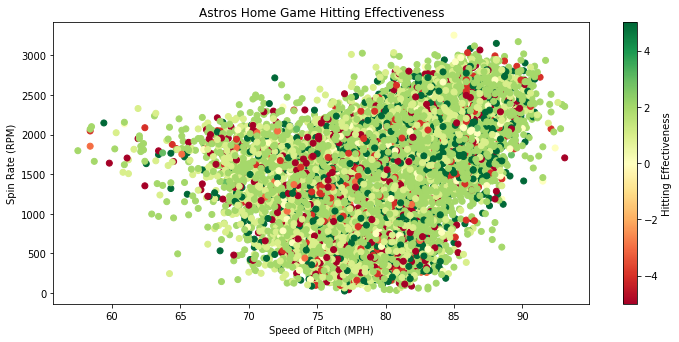

In [31]:

fig = plt.figure(figsize=(12,8))
ax1 = plt.subplot2grid((3,2), (0,0), colspan = 2, rowspan = 2)
ax1.set_title('Astros Home Game Hitting Effectiveness')
ax1.set_xlabel("Speed of Pitch (MPH)")
ax1.set_ylabel("Spin Rate (RPM)")
sctr = ax1.scatter(x =hou_2017_home.end_speed, y=hou_2017_home.spin_rate, c = hou_2017_home.Effectiveness, cmap='RdYlGn')
cbar = plt.colorbar(sctr, ax=ax1)
cbar.set_label('Hitting Effectiveness')
plt.savefig("strosHittingEffect.png")

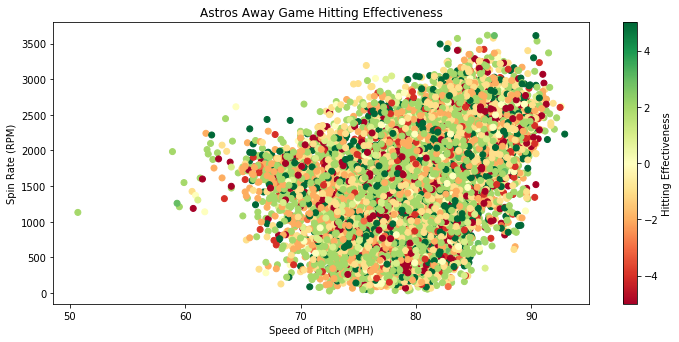

In [40]:
fig = plt.figure(figsize=(12,8))
ax1 = plt.subplot2grid((3,2), (0,0), colspan = 2, rowspan = 2)
ax1.set_title('Astros Away Game Hitting Effectiveness')
ax1.set_xlabel("Speed of Pitch (MPH)")
ax1.set_ylabel("Spin Rate (RPM)")
sctr = ax1.scatter(x =hou_2017_away.end_speed, y=hou_2017_away.spin_rate, c = hou_2017_away.Effectiveness, cmap='RdYlGn')
cbar = plt.colorbar(sctr, ax=ax1)
cbar.set_label('Hitting Effectiveness')
plt.savefig("awayAstros.png")